In [1]:
# This scrapes data from FITS headers taken with the LBTI instrument
# (Python 3.5)

# Created by E.S., 2018 October

In [2]:
## For a demo of how this notebook works, download the fake FITS files in the directory
## YOURUSERNAME@lbti-cdata:/mnt/iscsi/lmircam/L0/fake_fits
## to a local directory /fake_fits/ which sits within the directory this notebook is in.
## Then proceed through the following steps. Edit this notebook as you wish once you are 
## ready to run it on your own data.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
#import sys
import glob, os
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [1]:
#stem = '/Users/bandari/Documents/git.repos/hd_141569/overview_data/'
stem = '/Volumes/One Touch/procyon_fizeau_2023B/raw_data/'

In [4]:
file_list = glob.glob(stem + '*fits')

In [18]:
def read_fits_headers(filenames):
    # Initialize DataFrame
    df_list = []

    # Loop over FITS files
    for filename in filenames:
        print(filename) # fyi
        # Open FITS file
        with fits.open(filename) as hdul:
            # Get header and convert to dictionary
            header_dict = dict(hdul[0].header)
            del header_dict['COMMENT'] # remove junk

        # make dict of info
        df_interim = pd.DataFrame(header_dict, index=[0])
        # add file name and frame number
        df_interim['FILENAME'] = str(os.path.basename(filename))
        df_interim['FRAMENUM'] = int(str(os.path.basename(filename)).split('_')[2].split('.fits')[0])

        # Append dictionary to DataFrame
        df_list.append(df_interim)

    df = pd.concat(df_list, ignore_index=True)
    return df

In [23]:
test = read_fits_headers(file_list)

/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000026.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000027.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000028.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000029.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000030.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000031.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000004.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000002.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000003.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000005.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000006.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000007.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000008.fits
/Volumes/One Touch/procyon_fizeau_2023B/raw_data/lm_240126_000009.fits
/Volum

In [20]:
list(test.keys())

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'NAXIS3',
 'BZERO',
 'BSCALE',
 'EXTEND',
 'INSTRUME',
 'PARTNER',
 'PID',
 'PI_NAME',
 'PROPID',
 'DIMMFLUX',
 'LBTTEMP',
 'LWIND1S',
 'RWIND1S',
 'SEEING',
 'SMTTAU',
 'WINDDIR',
 'WINDSPD',
 'LCMODES',
 'LGAIN',
 'LLOOPON',
 'LOFFSETX',
 'LOFFSETY',
 'LOFFSETZ',
 'LSLNULL',
 'LSTATUS',
 'LTTMODUL',
 'LWCCDBIN',
 'LWCCDFRQ',
 'RCMODES',
 'RGAIN',
 'RLOOPON',
 'ROFFSETX',
 'ROFFSETY',
 'ROFFSETZ',
 'RSLNULL',
 'RSTATUS',
 'RTTMODUL',
 'RWCCDBIN',
 'RWCCDFRQ',
 'LBT_AIRM',
 'LBT_ALT',
 'LBT_AZ',
 'LBT_DEC',
 'LBT_LST',
 'LBT_LXOS',
 'LBT_LYOS',
 'LBT_PARA',
 'LBT_RA',
 'LBT_RXOS',
 'LBT_RYOS',
 'LBT_UTC',
 'PCJD',
 'AGE_STOP',
 'IL_HORIZ',
 'LMIR_FW1',
 'LMIR_FW2',
 'LMIR_FW3',
 'LMIR_FW4',
 'LM_APWHL',
 'LM_FW25',
 'LM_MAGWL',
 'NCBMDVT',
 'NIC_NAC',
 'NIL_NDFW',
 'NIL_OPW',
 'NIL_PRW',
 'NLDCRC',
 'NLMGTLT',
 'NLNCNC',
 'NLPPLTLT',
 'NLWNTRNS',
 'NMCMSLD',
 'PIL_VERT',
 'COMTTEMP',
 'CPTEMP',
 'CTLRTEMP',
 'DETTEMP',
 'LMRHTPOW',

In [27]:
test = test.sort_values(by = 'FILENAME')

In [46]:
pd.set_option("max_rows", None)

OptionError: Pattern matched multiple keys

In [55]:
pd.set_option('display.max_rows', None)


In [58]:
test[['FRAMENUM','NAXIS1','NAXIS2','NAXIS3','ITIME']]

FRAMENUM  NAXIS1  NAXIS2  NAXIS3               ITIME
12895         1    2048    2048       2                 750
7             2    2048    2048       2                 750
8             3    2048    2048       2                 750
6             4    2048    2048       2                 750
9             5    2048    2048       2                 750
10            6    2048    2048       2                 750
11            7    2048    2048       2                 750
12            8    2048    2048       2                 750
13            9    2048    2048       2                 750
14           10    2048    2048       2                 750
15           11    2048    2048       2                 750
16           12    2048    2048       2                 750
17           13    2048    2048       2                 750
18           14    2048    2048       2                 750
19           15    2048    2048       2                 750
20           16    2048    2048       2                 750
21           17    2048    2048       2                 750
23           18    2048    2048       2                 750
22           19    2048    2048       2                 750
24           20    2048    2048       2                 750
25           21    2048    2048       2                 750
26           22    2048    2048       2                 750
27           23    2048    2048       2                 750
28           24    2048    2048       2                 750
0            26    2048    2048       2                 750
1            27    2048    2048       2                 750
2            28    2048    2048       2                 750
3            29    2048    2048       2                 750
4            30    2048    2048       2                 750
5            31    2048    2048       2                 750
29           32    2048    2048       2                 750
30           33    2048    2048       2                 750
31           34    2048    2048       2                 750
32           35    2048    2048       2                 750
33           36    2048    2048       2                 750
34           37    2048    2048       2                 750
35           38    2048    2048       2                 750
36           39    2048    2048       2                 750
37           40    2048    2048       2                 750
38           41    2048    2048      25                2600
39           42    2048    2048      25                2600
40           43    2048    2048      25                2600
41           44    2048    2048      25                2600
42           45    2048    2048      25                2600
43           46    2048    2048      25                2600
44           47    2048    2048      25                2600
45           48    2048    2048      25                2600
46           49    2048    2048      25                2600
47           50    2048    2048      25                2600
48           51    2048    2048      25                2600
49           52    2048    2048      25                2600
50           53    2048    2048      25                2600
52           54    2048    2048      25                2600
51           55    2048    2048      25                2600
53           56    2048    2048      25                2600
54           57    2048    2048      25                2600
55           58    2048    2048      25                2600
56           59    2048    2048      25                2600
57           60    2048    2048      25                2600
58           61    2048    2048      25                   0
59           62    2048    2048      25                   0
60           63    2048    2048      25                   0
61           64    2048    2048      25                   0
62           65    2048    2048      25                   0
63           66    2048    2048      25                   0
64           67    2048    2048      25        

In [29]:
test.to_csv('junk.csv')

In [33]:
df = test

# Display method 2: put quantities from the whole 
# data set into a block diagram

KeyError: 'ACTEXP'

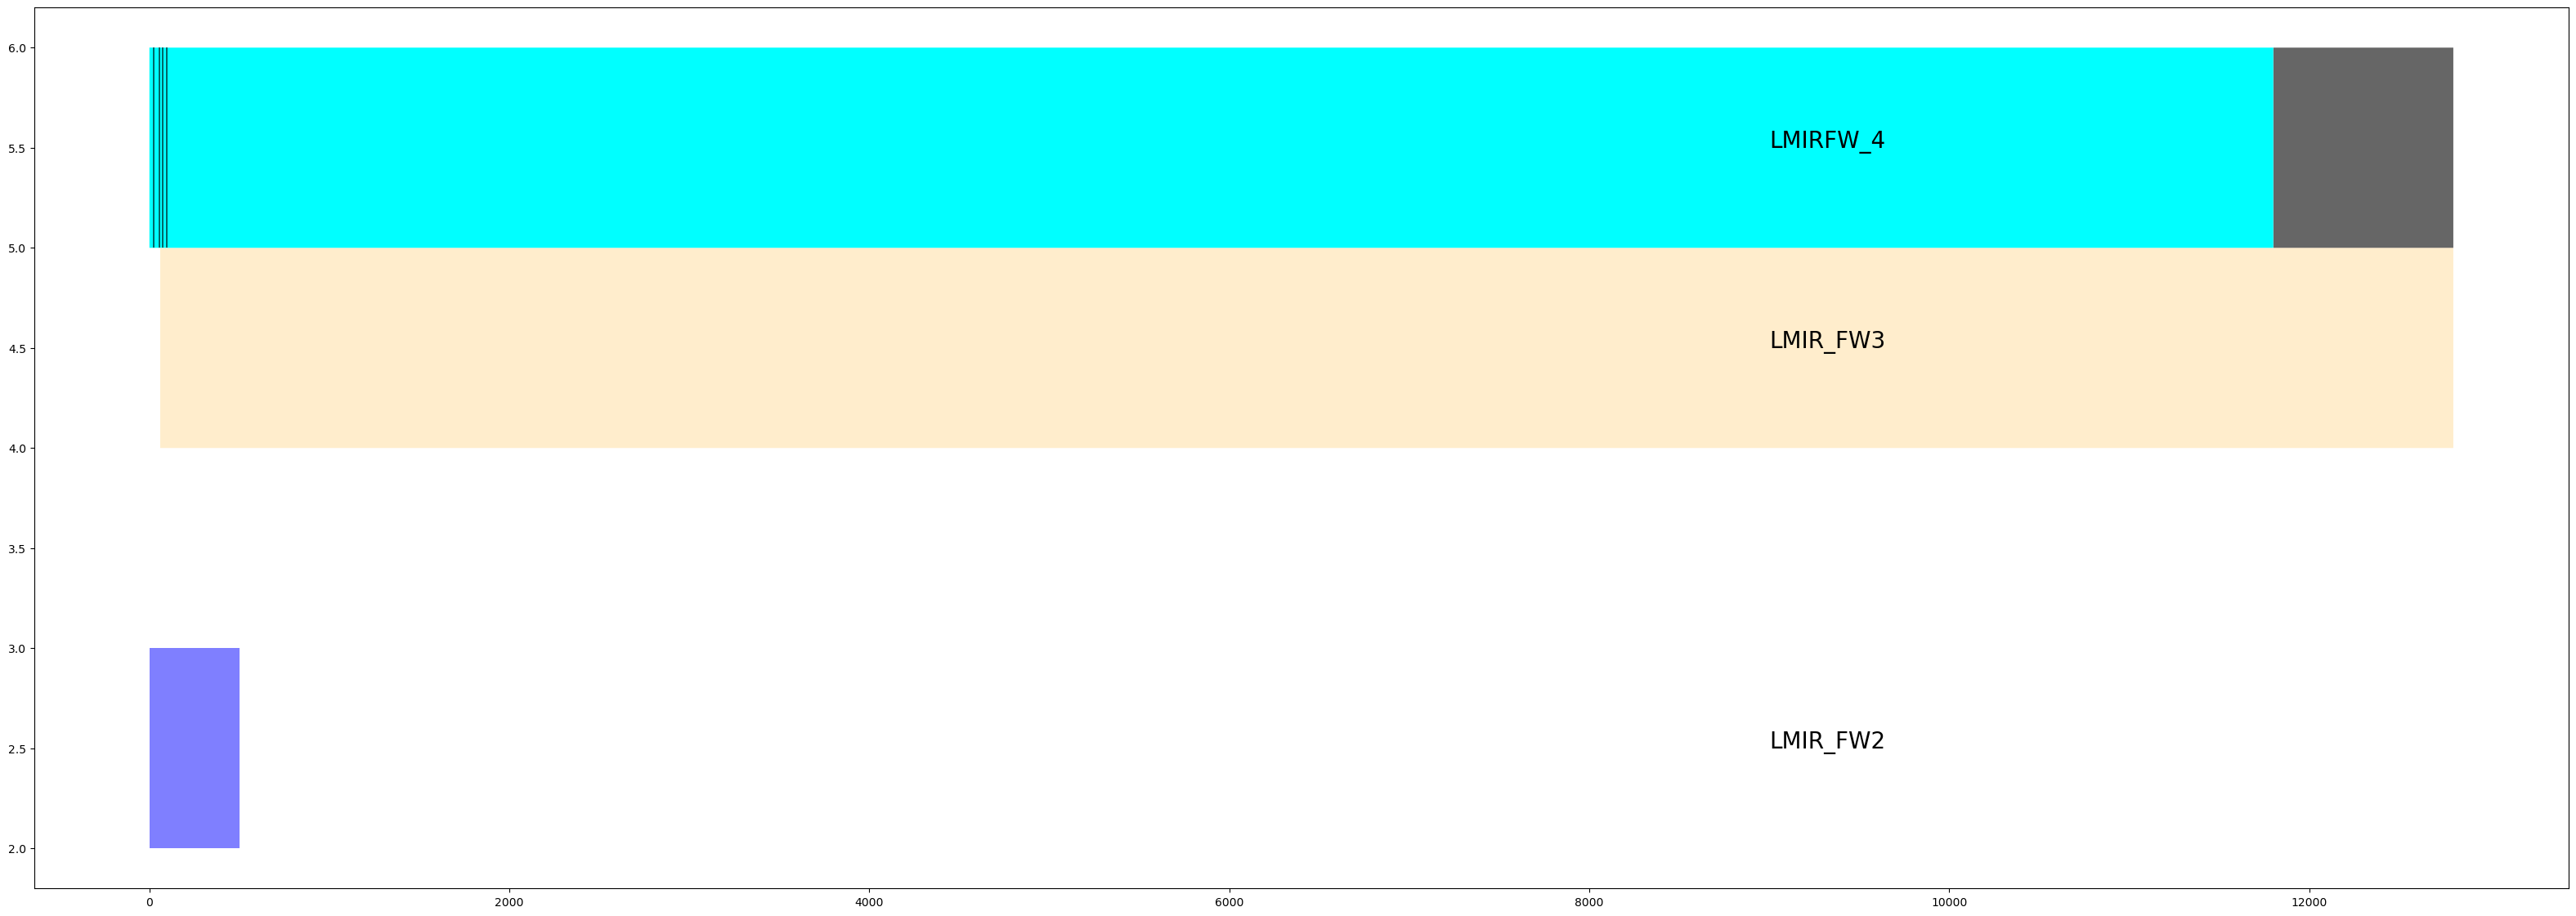

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(40,14)


# LMIR FW2
ax.fill_between(df["FRAMENUM"], 2, 3, where=df["LMIR_FW2"]=="ND1.0-T10", \
                facecolor='blue', label='FW2 = ND1.0-T10', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 2, 3, where=df["LMIR_FW2"]=="ND2.0-T1", \
                facecolor='blue', label='FW2 = ND2.0-T1', alpha=0.2)
ax.annotate('LMIR_FW2', xy=(9000, 2.5), size=20, xycoords='data')



# LMIR FW3
ax.fill_between(df["FRAMENUM"], 4, 5, where=df["LMIR_FW3"]=="Lgrism6AR", \
                facecolor='orange', label='FW3 = Lgrism6AR', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 4, 5, where=df["LMIR_FW3"]=="Open", \
                facecolor='orange', label='FW3 = Open', alpha=0.2)
ax.annotate('LMIR_FW3', xy=(9000, 4.5), size=20, xycoords='data')


# LMIR FW4
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Br-Alpha-On", \
                facecolor='cyan', label='FW4 = Br-Alpha-On', alpha=1)
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Open", \
                facecolor='cyan', label='FW4 = Open', alpha=0.2)
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Std-L", \
                facecolor='grey', label='FW4 = Std-L', alpha=0.6)
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Blank", \
                facecolor='black', label='FW4 = Blank', alpha=0.6)
ax.annotate('LMIRFW_4', xy=(9000, 5.5), size=20, xycoords='data')


# Integration time
ax.fill_between(df["FRAMENUM"], 6, 7, where=df["ACTEXP"]==145976, \
                facecolor='darkgreen', label='ACTEXP = 0.145976 sec', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 6, 7, where=df["ACTEXP"]==1021832, \
                facecolor='darkgreen', label='ACTEXP = 1.021832 sec', alpha=0.2)
ax.fill_between(df["FRAMENUM"], 6, 7, where=df["ACTEXP"]==1167808, \
                facecolor='darkgreen', label='ACTEXP = 1.167808 sec', alpha=1)
ax.annotate('ACTEXP', xy=(9000, 6.5), size=20, xycoords='data')


# Phase controlled?
ax.fill_between(df["FRAMENUM"], 7, 8, where=df["PCCLOSED"]==1, \
                facecolor='black', label='PCCLOSED = True', alpha=0.2)
ax.annotate('PCCLOSED', xy=(9000, 7.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(df["FRAMENUM"], 8, 9, where=df["LLOOPON"]==1, \
                facecolor='peru', label='L/R AOLOOP = True', alpha=1)
ax.annotate('LLOOPON', xy=(9000, 8.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(df["FRAMENUM"], 9, 10, where=df["RLOOPON"]==1, \
                facecolor='peru', alpha=1)
ax.annotate('RLOOPON', xy=(9000, 9.5), size=20, xycoords='data')

ax.legend(loc='upper right', bbox_to_anchor=(1., 1))

plt.xlim([9000,9020])
plt.suptitle("Data set frame blocks")
plt.xlabel("frame number")
plt.tight_layout()

# save figure
#plt.savefig(block_diagram, bbox_inches='tight')

# ... or just show figure
plt.show()

# Display method 3: old-fashioned plotting

In [11]:
# for plotting

infoOfInterest = df[np.logical_and((df['FRAMENUM'] >= 4249), (df['FRAMENUM'] <= 11381) )] # all altair frames

#infoOfInterest = df[np.logical_and((df['FRAMENUM'] >= 8000), (df['FRAMENUM'] <= 8300) )]

ut_time = pd.to_datetime(infoOfInterest['LBT_UTC'], format='%H:%M:%S.%f', utc=True)
ut_time_dec = pd.Series([val.time() for val in ut_time])

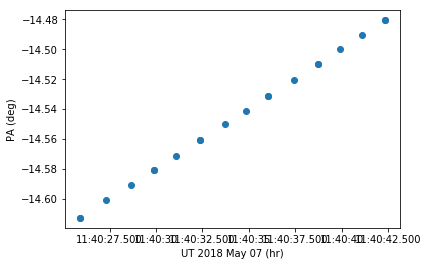

In [14]:
# PA

plt.plot(ut_time_dec,infoOfInterest['LBT_PARA'], linestyle='None', marker='o')
plt.xlabel('UT 2018 May 07 (hr)')
plt.ylabel('PA (deg)')
plt.show()

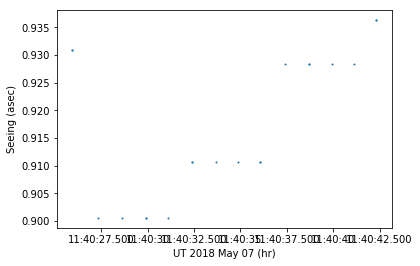

In [15]:
# Seeing

plt.plot(ut_time_dec,infoOfInterest['SEEING'], linestyle='None', marker='o', markersize=1)
plt.xlabel('UT 2018 May 07 (hr)')
plt.ylabel('Seeing (asec)')
plt.show()

In [37]:
df['PCCLOSED'].describe()

count                  12896
unique                     2
top                        1
freq                    9877
Name: PCCLOSED, dtype: object